
# Project: Investigating the Data on "No-Show Appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments. The investigation to be conducted on this dataset will be providing answers to the following question:

1. What are the factors predicting the ability of patients to show up for an appointment? 

Furthermore, a description of the relationship between the predictors of appointment show-up and patients' ability to show-up for appointments will also be explored.

Importing the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

<a id='wrangling'></a>
## Data Wrangling

In this section, the data will be loaded and checked for cleanliness.

### General Properties

Loading the dataset

In [2]:
mydata = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

Next step is to view the first 5 rows of the dataset to confirm that our data has been succefully uploaded.

In [3]:
mydata.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next step is to inspect our data for any anomally like missing values or duplicated data. But first, we check the shape of our data, i.e., the total number of rows and columns in our dataset

In [4]:
mydata.shape

(110527, 14)

The data has a total of 110527 rows and 14 columns.

Next step is to check for missing values across all columns.

In [5]:
mydata.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the above output, no column has any missing value. I will proceed to check for the total number of duplicate values in the dataset

In [6]:
sum(mydata.duplicated())

0

To conclude this phase of data wrangling, I will be using the function below to check the datatypes of all columns in my data.

In [7]:
mydata.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Data Cleaning

From the data wrangling carried out above, the following were observed:
1. The dataset has 14 rows and 110527 columns
2. There are no missing values in the dataset
3. There are no duplicated values in the dataset.

In this section, the dataset will be cleaned for effective analysis.

All columns not required for this analysis will be removed using the drop() function.

The columns to be dropped are: PatientId, AppointmentID, ScheduledDay, AppointmentDay and Neighbourhood

In [8]:
mydata.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis=1, inplace=True)

To confirm if this has been successfully executed, I will be checking the first row of the dataset

In [9]:
mydata.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


Next action will be to check the unique values of 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', and 'SMS_received'. These are binary response variables and should have only two unique values - 0 (False) and 1 (True).

Also, Gender (M/F) and No-show (Yes/No) will also be checked.

In [10]:
mydata['Gender'].unique(), mydata['Scholarship'].unique(), mydata['Hipertension'].unique(), mydata['Diabetes'].unique(), mydata['Alcoholism'].unique(), mydata['Handcap'].unique(), mydata['SMS_received'].unique(), mydata['No-show'].unique()

(array(['F', 'M'], dtype=object),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1, 2, 3, 4], dtype=int64),
 array([0, 1], dtype=int64),
 array(['No', 'Yes'], dtype=object))

It seems the variable 'Handcap' has some outliers. Next is to explore the number of outliers in that column by checking the number of each unique value.

In [11]:
mydata['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

There is a total of 199 outliers (2, 3 and 4). 

Next action will be to drop all rows containing these outliers given that it is a small proportion of the entire dataset using the function mydata.drop()

In [12]:
mydata.drop(mydata.index[mydata['Handcap'] == 2], inplace=True)
mydata.drop(mydata.index[mydata['Handcap'] == 3], inplace=True)
mydata.drop(mydata.index[mydata['Handcap'] == 4], inplace=True)
mydata['Handcap'].value_counts()                              

0    108286
1      2042
Name: Handcap, dtype: int64

Next step is to create a new column called "illness_incidence". This would record the number of illnesses faced by any individual from the list of illnesses captured in the dataset. This column will be the sum of columns 'Hipertension', 'Diabetes', 'Alcoholism' and 'Handcap. 

Rationale: Although, these four variables are binary responses, we will be treating them as integers. This means that where an individual selects True, the code for True (1) will be treated as an integer. By implication, no individual can have a value exceeding '4' in the new column. 

Create a list of selected columns called "Columnlist".

In [13]:
columnlist = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

Sum the items in columns and input the value in a new column called "illness_incidence".

In [14]:
mydata['illness_incidence'] = mydata[columnlist].sum(axis=1)

Next step is to check the unique elements in the new column.

In [15]:
mydata['illness_incidence'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

I will be confirming if the new column has been included to my dataset by viewing the first 5 rows.

In [16]:
mydata.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,illness_incidence
0,F,62,0,1,0,0,0,0,No,1
1,M,56,0,0,0,0,0,0,No,0
2,F,62,0,0,0,0,0,0,No,0
3,F,8,0,0,0,0,0,0,No,0
4,F,56,0,1,1,0,0,0,No,2


Next step is to drop the following columns as they will not be needed in analysis: Hipertension, Diabetes, Alcoholism and Handcap.

In [17]:
mydata.drop(['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], axis=1, inplace=True)

Checking my new dataset to confirm if the above columns have been dropped.

In [18]:
mydata.head()

,Gender,Age,Scholarship,SMS_received,No-show,illness_incidence
0,F,62,0,0,No,1
1,M,56,0,0,No,0
2,F,62,0,0,No,0
3,F,8,0,0,No,0
4,F,56,0,0,No,2


Next I will be using the pd.get_dummies() function to change the values of 'No-show' column into 1s and 0s. This function has been adopted by Rowan L. (2017): The Dummy’s Guide to Creating Dummy Variables (https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40).

In [19]:
mydummy = pd.get_dummies(mydata['No-show'])
mydummy.head()    

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Next step will be to use the concatenate function (pd.concat()) to combine the new columns with my existing dataframe. This has been adopted by the following statisticians:

Rowan, L. (2017). The Dummy’s Guide to Creating Dummy Variables (https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40).


Kyle, S. (2022). Combining Data in Pandas With merge(), .join(), and concat() (https://realpython.com/pandas-merge-join-and-concat/) 


In [20]:
mydata = pd.concat([mydata, mydummy], axis=1)
mydata.head()

,Gender,Age,Scholarship,SMS_received,No-show,illness_incidence,No,Yes
0,F,62,0,0,No,1,1,0
1,M,56,0,0,No,0,1,0
2,F,62,0,0,No,0,1,0
3,F,8,0,0,No,0,1,0
4,F,56,0,0,No,2,1,0


Having included the new columns, I will be dropping "No-show" and "Yes" column, leaving only "No" column.

This is because the "No" response was assigned a value of "1", therefore, "Yes" response automatically assumes "0".

But first, I will check the "No" column to ensure it contains two unique values "1" and "0"


In [21]:
mydata['No'].unique()

array([1, 0], dtype=uint8)

Next step will be to drop the 'no_show' and 'Yes' columns using the df.drop() function.

In [22]:
mydata.drop(['No-show', 'Yes'], axis=1, inplace=True)
mydata.head()

,Gender,Age,Scholarship,SMS_received,illness_incidence,No
0,F,62,0,0,1,1
1,M,56,0,0,0,1
2,F,62,0,0,0,1
3,F,8,0,0,0,1
4,F,56,0,0,2,1


Next step will be to rename the 'No' column to 'no_show'

In [23]:
mydata = mydata.rename(columns= {'No':'no_show'}) 

The above table contains the data needed for analysis. However, the following steps will be conducted before commencing exploration and analysis:
1. Check all data types
2. Check the data description for any outliers.

In [24]:
mydata.dtypes

Gender               object
Age                   int64
Scholarship           int64
SMS_received          int64
illness_incidence     int64
no_show               uint8
dtype: object

From the above output, Scholarship', 'SMS_received', 'no_show are int data types and I will be changing them to strings

In [25]:
mydata[['Scholarship', 'SMS_received', 'no_show']] = mydata[['Scholarship', 'SMS_received', 'no_show']].astype('object')

Check all data types to confirm the change.

In [26]:
mydata.dtypes

Gender               object
Age                   int64
Scholarship          object
SMS_received         object
illness_incidence     int64
no_show              object
dtype: object

The data types have been successfully changed.

The next step is to view the summary statistics using the function df.describe(). This would help investigate for further outliers within the data set.

In [27]:
mydata.describe()

,Age,illness_incidence
count,110328.000000,110328.000000
mean,37.070408,0.317327
std,23.098231,0.622223
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,4.000000


The column "Age" has a negative value (see minimum value above). This is an outlier as we cannot have a negative age. So I want to replace the negative value with the mean of the column "Age".

First step is to Calculate the mean of "Age" and store it in the dataframe 'mean_Age

In [28]:
mean_Age = mydata['Age'].mean()

Next step is to replace all negative values in the column 'Age' with the mean

In [29]:
mydata[mydata['Age']< 0] = mean_Age

Let us view the summary statistics of Age column to confirm if this has been successfully executed.

In [30]:
mydata['Age'].describe() 

count    110328.000000
mean         37.070753
std          23.097947
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

This has been changed but we need to change the 'Age' data type from Float to Int.

In [31]:
mydata['Age'] = mydata['Age'].astype(int)
mydata.dtypes

Gender                object
Age                    int32
Scholarship           object
SMS_received          object
illness_incidence    float64
no_show               object
dtype: object

I will also be changing the data type of illness_incidence from float to int.

In [32]:
mydata['illness_incidence'] = mydata['illness_incidence'].astype(int)
mydata.dtypes

Gender               object
Age                   int32
Scholarship          object
SMS_received         object
illness_incidence     int32
no_show              object
dtype: object

Next step is to check the columns of all variables of interest for their unique values and remove any outliers. 

Checking "no_show" for unique values.

In [33]:
mydata['no_show'].unique()

array([1, 0, 37.07040823725618], dtype=object)

There seem to be an outlier across columns - "37.07040823725618". I will be dropping the row with "37.07040823725618" from the "no_show" column and this should take care of the other columns since they are all on the same row.

In [34]:
mydata.drop(mydata.index[mydata['no_show'] == 37.07040823725618], inplace=True)

Checking across all columns

In [35]:
mydata[['Gender', 'Scholarship', 'SMS_received', 'illness_incidence', 'no_show']].value_counts()

Gender  Scholarship  SMS_received  illness_incidence  no_show
F       0            0             0                  1          25895
M       0            0             0                  1          16499
F       0            1             0                  1          11816
                     0             1                  1           6113
M       0            1             0                  1           5937
                                                                 ...  
                     0             4                  0              1
F       0            1             4                  0              1
                     0             4                  0              1
M       1            1             3                  0              1
                                                      1              1
Length: 69, dtype: int64

This looks good! Next section covers data exploration and analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are the factors predicting the ability of patients to show up for an appointment? 

Variables to be considered as predictors will be "age", "scholarship", "incidence of illnesses" and "SMS_received". 

Description of variables.

Predictors:
1. Age: a numerical variable

2. Scholarship: refers to whether or not the patient is enrolled in Brasilian welfare program- Bolsa Família (1 = Enrolled (True), 0 = not enrolled (False))

3. SMS_received: refers to whether one or more sms notification(s) was sent to patients (1 = SMS sent (True), 0 = SMS not sent (False))

4. Illness Incidence: refers to the total number of reported illnesses (the list from the dataset include: Hipertension Diabetes Alcoholism and Handcap)

Dependent variable

no-show: refers to whether scheduled patients showed up for their appointment or not (1 = No (meaning they showed up), 0 = Yes (meaning they did not show up))

I will be conducting a visual exploration of the relationship between each predictor and the dependent variable and a Logistic Regression will be used to show the effect of each predictor on the dependent variable.

The first figure  will show the distribution of the patients based on their appointment show-ups. But first, I will be creating a function that will be called to plot the distribution plots.

Creating a function to show plots for the distribution of the variables.

In [37]:
def distrplot(title, x, label):
    Data_plot = sns.countplot(x= x, data = mydata)
    Data_plot.set_title(title, fontsize=14, fontweight='bold', color='red')
    Data_plot.set_xlabel(x, fontsize=18, color='black')
    Data_plot.set_ylabel('count', fontsize=18, color='black')

Testing the function

In [38]:
distrplot

<function __main__.distrplot(title, x, label)>

Next step will be to show the plot for the distribution of the patients based on their attendance to appointment sessions.

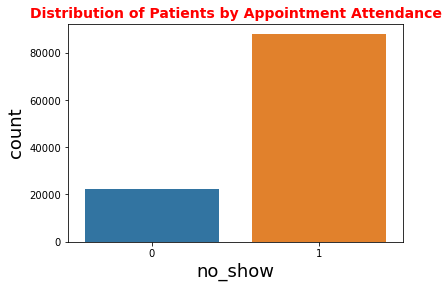

In [39]:
distrplot('Distribution of Patients by Appointment Attendance', 'no_show', 'no_show')

Figure explained: The above figure shows the distribution of patients by their attendance to appointments. The reference code is "1" which means "No" ( a response to the question of "no show to appointment"). This means that patients who selected "No" showed up for their appointments and those who selected "Yes" (0), did not show up for their appointment. From the figure above, more patients showed up for their appointment.

The next plot will be a plot showing the distribution of the patients by "Gender"

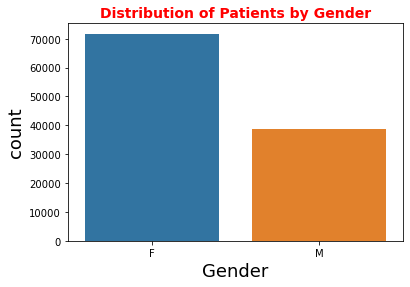

In [40]:
distrplot('Distribution of Patients by Gender', 'Gender', 'Gender')

Figure explained: From the above figure, the data set contains more females than male patients. To have a further understanding of the age distribution of the patients' gender, I will be plotting a box plot showing the age distribution of the different gender.

The first step is to create a function for the box plot called myboxplot()

In [41]:
def myboxplot(y, x, title, xlabel, ylabel):
    sns.boxplot(y=y, x=x, data=mydata, width=0.5, palette="colorblind")
    plt.title(title)
    plt.suptitle("")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

Let's call the above function

In [42]:
myboxplot

<function __main__.myboxplot(y, x, title, xlabel, ylabel)>

Next step is to plot the box plot showing the relationship between gender and age

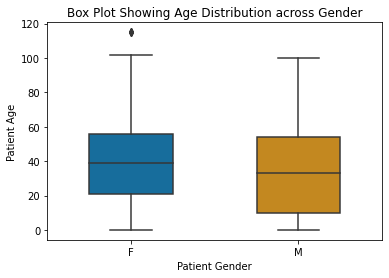

In [43]:
myboxplot('Age', 'Gender', 'Box Plot Showing Age Distribution across Gender', 'Patient Gender', 'Patient Age')

Figure explained: From the figure above, most young patients are males (M), the oldest patients are found among the female (F) patients and the mean age for the female patients is higher than the male patients. 

Let's have a look at the age distribution of the respondents using the kernel density distribution across both genders. This will help us see the skewness of the ages across both genders.

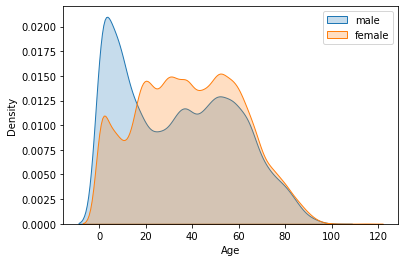

In [44]:
sns.kdeplot(mydata.Age[mydata.Gender=='M'], label='male', shade=True)
sns.kdeplot(mydata.Age[mydata.Gender=='F'], label='female', shade=True)
plt.xlabel('Age')
plt.legend()

Figure explained: This figure clearly shows the age composition as described in the box plot. The ages of the male patients are peaked betwee age 0 and 20. Generally, both figures appear to be right-skewed. However, for better understanding of the skewness, I will be plotting a distribution plot using the function sns.distplot(). This looks like a histogram but shows the spread clearly. 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

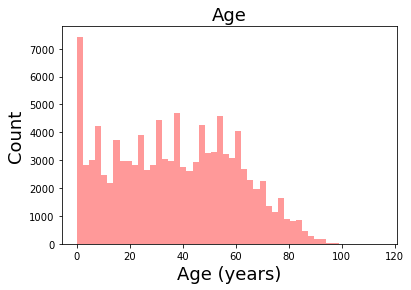

In [45]:
sns.distplot(mydata['Age'], kde=False, color='red', bins=50)
plt.title('Age', fontsize=18)
plt.xlabel('Age (years)', fontsize=18)
plt.ylabel('Count', fontsize=18)

Figure explained: This figure now shows the combined ditribution of both genders. The highest peak has been identified as male patients from previous plot. Generally, the age distribution is right-skewed, i.e., not normally distributed.

Next, I will be exploring the illness incidence report. I will be investigating the distribution of the respondents based on the number of reported illnesses using the sns.distplot().

I will be creating a function that can be called subsequently. 

Creating a function for sns.distplot()

In [46]:
def distplot(x, title, xlabel):
    sns.distplot(mydata[x], kde=False, color='blue', bins=50)
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel('Count', fontsize=18)


Calling the function to create the plot

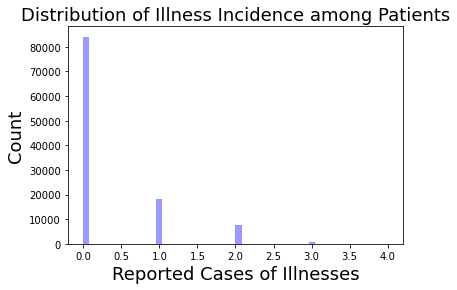

In [47]:
distplot('illness_incidence', 'Distribution of Illness Incidence among Patients', 'Reported Cases of Illnesses')

Figure explained: Most of the patients reported no case of the identified illnesses.

Next, I will be visualizing the distribution of the patients based on their participation in a welfare program. This is captured as "Scholarship" in the dataset.

Recall our distrplot()

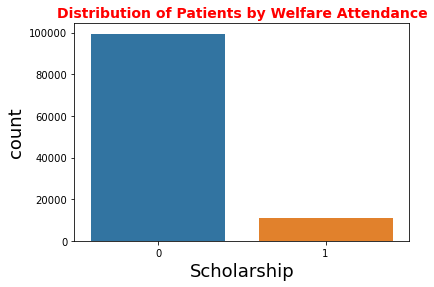

In [48]:
distrplot('Distribution of Patients by Welfare Attendance', 'Scholarship', 'Scholarship')

Figure explained: From the above figure, "0" represents patients who are not registered in a welfare program and "1" represents patients who are registered in a welfare program. Majority of the patients are not registered under any welfare program.

Next step will be the visualization of the relationship bewtween each predictor and "no_show".

First, let us create our function for the various plots.

In [49]:
def myrlshpplot(title, x, label):
    Compare_plot = sns.countplot(x= x, hue = 'no_show', data = mydata)
    Compare_plot.set_title(title, fontsize=14, fontweight='bold', color='red')
    Compare_plot.set_xlabel(label, fontsize=18, color='black')
    Compare_plot.set_ylabel('Count', fontsize=18, color='black')

Visualization of the relationship between scholarship (enrolment in welfare program) and appointment show-up

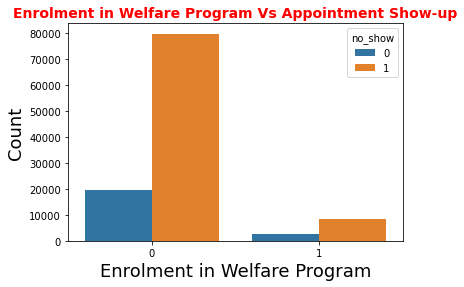

In [50]:
myrlshpplot('Enrolment in Welfare Program Vs Appointment Show-up', 'Scholarship', 'Enrolment in Welfare Program')

Visualization of the relationship between receipt of SMS and appointment show-up

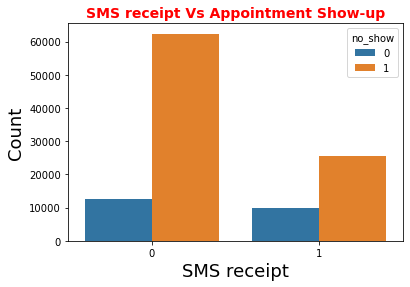

In [51]:
myrlshpplot('SMS receipt Vs Appointment Show-up', 'SMS_received', 'SMS receipt')

Visualization between the relationship between gender and appointment show up

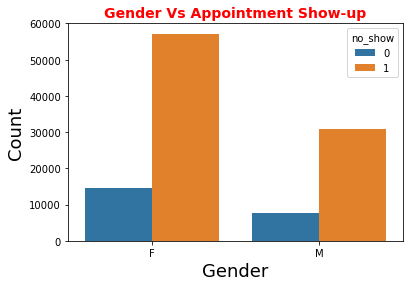

In [52]:
myrlshpplot('Gender Vs Appointment Show-up', 'Gender', 'Gender')

Figure explained: Across both genders, more patients showed up for their appointments.

Visualization of the relationship between incidence of illness and appointment show up

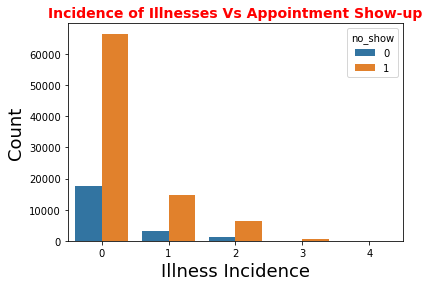

In [53]:
myrlshpplot('Incidence of Illnesses Vs Appointment Show-up', 'illness_incidence', 'Illness Incidence')

The aboive figures have provided a visual representation of the nature of the relationship between the predictors and the dependent variable (no_show).
To further explore this relationship, I will be using Logistic Regression to quantify the effect of each predictor on the dependent variable. This analysis is vital because it furnishes us with more information about the significance of each predictor, thereby providing evidence for policies around appointment booking for patients.

About Logistic Regression: Logistic regression describes relationship between a binary response dependent variable (in this case, Yes (0) or No (1) responses to appointment show-up) and one or more independent variables.

Description of the Variables>
1. no_show: This variable describes patients' responses to scheduled appointment. It is coded "1" for "No" (which means the patient showed up) and "0" for "Yes" (which means the patient did not show up).
2. Gender: Classification of patients by sex - "1" for "Male" and "0" for "Female".
3. Age: Patients age.
4. Scholarship: This describes paients under a welfare program - "1" for "membership" and "0" for "non-membership"
5. SMS_receipt: A variable that describes if SMS notifications were sent to patients scheduled for an appointment - "1" is for "Yes" and "0" is for "No".
6. Illness_incidence: Describe the total number of reported cases of illnesses by the patients.

Converting "Gender" from categorical to binary response variable

In [54]:
mydata['Gender'].replace({'M': '1', 'F': '0'}, inplace=True)

In [55]:
mydata['Gender'].unique()

array(['0', '1'], dtype=object)

Listing the dependent (Y) and independent (Xs) variables for Logistic Regression

In [56]:
depd_var_y = mydata['no_show']
indepd_var_x = mydata.drop(['no_show'], axis=1)
indepd_var_x.dtypes

Gender               object
Age                   int32
Scholarship          object
SMS_received         object
illness_incidence     int32
dtype: object

I will be expressing "no_show" as a binary variable. Although it was dummied, only one column was adopted and the second column deleted. This will affect the analysis.

The "no_show" column will be traansformed back to categorical variable and then to binary response.

In [57]:
mydata['no_show'].replace({'1': 'No', '0': 'Yes'}, inplace=True)

In [58]:
mydata['no_show'].replace({'No': '1', 'Yes': '0'}, inplace=True)

To run a logistic regression, the data set will be divided into two: Training and Test data set. The training dataset will be used to train the model to be able to fit the test data to the regression line. This method has been adopted by the following statisticians:

Mirko, S. (2020). Logistic Regression in Python (https://realpython.com/logistic-regression-python/#author).
Renesh, B. (2021). Logistic regression in Python (feature selection, model fitting, and prediction) (https://www.reneshbedre.com/blog/logistic-regression.html)

Splitting data into training (70%) and testing (30%) dataset

In [59]:
x_train,x_test,y_train,y_test=train_test_split(indepd_var_x,depd_var_y,test_size=0.3,random_state=0)

Setting up my logistic regression function

In [60]:
my_logreg = LogisticRegression()

Fitting the model

In [61]:
my_logreg.fit(x_train, y_train)

LogisticRegression()

Predicting the value of the dependent variable (y)

In [62]:
y_predict=my_logreg.predict(x_test)

I will be checking my model for accuracy by importing classification_report, confusion matrix and accuracy score. 

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

First step will be to get the Classification Report from which the confusion matrix can be derived

In [64]:
classification_report(y_test, y_predict)
pd.DataFrame(confusion_matrix(y_test, y_predict), columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Predicted No,Predicted Yes
Actual No,0,6608
Actual Yes,0,26491


The above is called a "Confusion Matrix". It shows the relationship between the model prediction and the actual data. It determines the accuracy of the model. Ideally an accuracy score that is above 60% is a good indication. For more information on confusion mtrix, see the link: Simple guide to confusion matrix terminology (https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=A%20confusion%20matrix%20is%20a,related%20terminology%20can%20be%20confusing).

Let's compute the accuracy score.


In [65]:
accuracy_score(y_test, y_predict)

0.8003565062388592

The model has an accuracy score of 80% which is a good indication.

Let's get the coefficient of the intercept for the logistic regression.

In [66]:
print("The intercept b0= ", my_logreg.intercept_)

The intercept b0=  [1.36757795]


Let's get the summary statistics of our regression model

In [67]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, x_train.astype(float))
result=logit_model.fit(method = 'newton')
result.summary()

Optimization terminated successfully.
         Current function value: 0.524578
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                no_show   No. Observations:                77228
Model:                          Logit   Df Residuals:                    77223
Method:                           MLE   Df Model:                            4
Date:                Mon, 30 May 2022   Pseudo R-squ.:                -0.03999
Time:                        21:24:17   Log-Likelihood:                -40512.
converged:                       True   LL-Null:                       -38954.
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender                0.6123      0.017     36.116      0.000       0.579       0.646
Age                   0.0298      0.000     88.612      0.000       0.029       0.030
Scholarship           0.3243      0.028     11.471      0.000       0.269       0.380
SMS_received         -0.2369      0.017    -13.670      0.000      -0.271      -0.203
illness_incidence    -0.2024      0.017    -11.769      0.000      -0.236      -0.169
=====================================================================================
"""

The above table shows the summary of the findings. It should be noted that unlike linear regression, the coefficients are log odds. Therefore, in describing their effect on the dependent variable, the odd ratio is used.

I will be using the formular below to calculate the odd ratios of the various coefficients.

In [68]:
np.exp(my_logreg.coef_)

array([[1.00156099, 1.00716645, 0.83008927, 0.52233408, 0.99402381]])

<a id='conclusions'></a>
## Conclusions

Summary of Findings.

The plots shown above describes the following:
1. From the 'no_show" plot, we observe that the patients who attended their scheduled appointment were far more than those that did not.

2. It was observed from the plot between "Scholarship" and "no_show" that majority of people who made it to the appointment were not enrolled in the welfare program. Several factors could be responsible among which could be a clash in timimg between welfare meetings and appointment date or little emphasis on the need to make the doctor's appointment by the welfare program officials. This will require further investigation for confirmation.

3. Surprisingly, people who did not receive sms notification attended more appointments than those who received. One would expect that sms notification would motivate patients to make their appointments but this was not the case. In terms of cost for the hospital, it could mean that they need to channel their focus elsewhere and cut down on the costs incurred semding sms to patients as this is not effective.

4. Across both genders, the people who attended appointments were more than those who did not.

5. The plot between "illness incidence" and "no_show" revealed that as the reported cases of illnesses increased, the number of patients who attended their appointments declined. This could be as a result of constraints caused by the illnesses making it it difficult for patients to leave their homes unassissted.

6. The age distribution is right-skewed with most patients around 0 years of age. The large number of patients in the 0 years age bracket could imply that the appointments were pediatric appointments for nursing mothers.

7. From the logistic regression, SMS_received and illness_incidence corroborated the relationship shown in the visualization plot. Both variables have negative coefficients showing an inverse relationship with the dependent variable. Using their odd ratios, the odd ratio of 0.55 indicates that for every sms notification sent, the odds of a patient showing up for an appointment decreases by 0.55. Furthermore, a value of 0.99 indicates that for every additional illness experience, the odds of showing up for an appointment declines by 0.99. In addition, even though the dataset has more female paients, the logistic regression reports that the odds of showing up for an appointment increases by 1.00 and an increase in age by one year increases the odds of showing up for an appointment by 1.00. Finally, contrary to what the plot between scholarship and no_show displays, the logistic regression reported that joining the welfare program increases the odds of showing up for an appointment by 0.83.

8. The p-values show that the effect of ALL the predictors on the dependent variable is highly significant.

Limitations.

The following are the limitations of this analysis.

1. The analysis did not consider the neighbourhood of the patients. This probably could have been a significant contributor to their ability to show up for an appointment.

2. The data had a lot of Zero (0s) leading to the assumption that the information was on pediatric appointments rather than input error.

3. Both genders were not equally represented in the dataset, thereby affecting the robustness of the conclusion.